# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
df = pd.read_csv('twitter_dis.csv')

In [5]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Part1. Explore Dataset Structure

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [9]:
df.shape

(7613, 5)

In [11]:
df.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

# Check missing values

In [13]:
#checking missing values:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

# Class Distribution (Disaster vs. Non-Disaster)

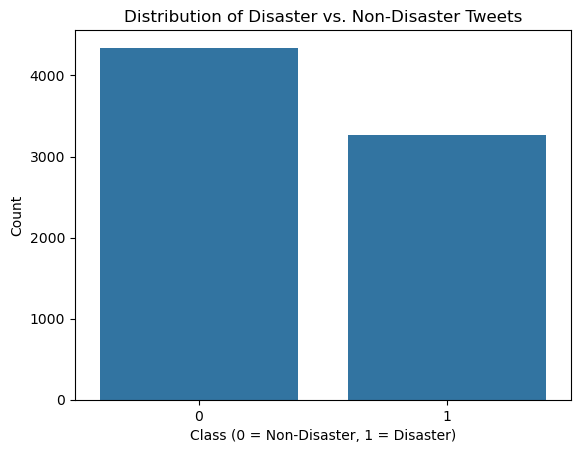

In [15]:
sns.countplot(data=df, x='target')
plt.title("Distribution of Disaster vs. Non-Disaster Tweets")
plt.xlabel("Class (0 = Non-Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.show()

# Keyword Frequency Analysis

In [17]:
disaster_tweets = df[df['target'] == 1]
non_disaster_tweets = df[df['target'] == 0]

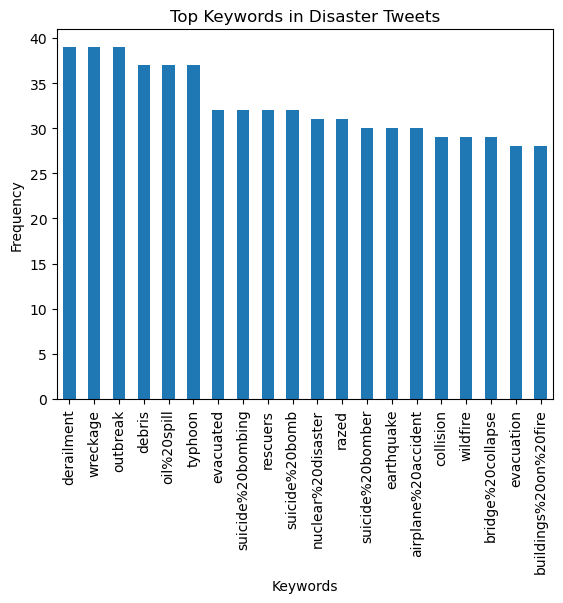

In [19]:
# Plot frequency of keywords in disaster tweets
disaster_keyword_counts = disaster_tweets['keyword'].value_counts().head(20)
disaster_keyword_counts.plot(kind='bar', title="Top Keywords in Disaster Tweets")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.show()

## Visualising lengths of tweets

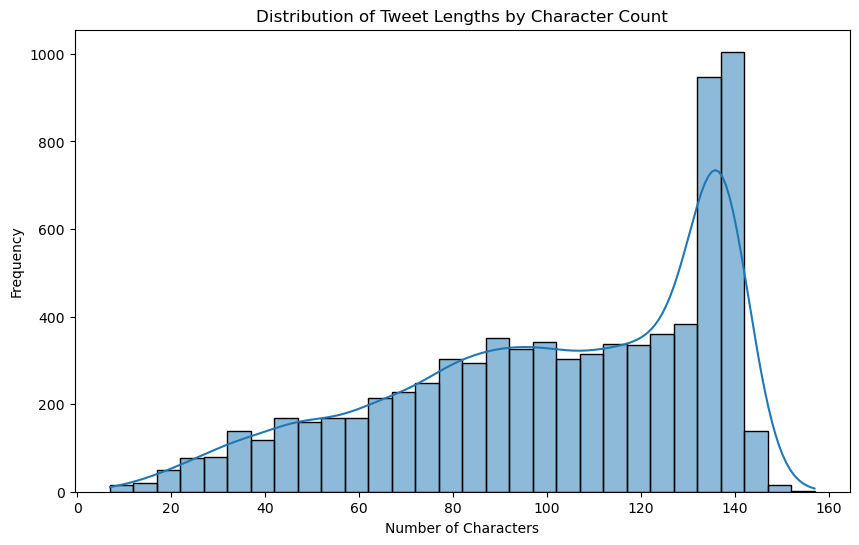

In [22]:
# Calculate tweet length by character count
df['char_length'] = df['text'].apply(len)

# Plotting the distribution of tweet lengths by character count
plt.figure(figsize=(10, 6))
sns.histplot(df['char_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths by Character Count")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

In [24]:
df.char_length.describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: char_length, dtype: float64

In [26]:
df[df['char_length'] == 157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

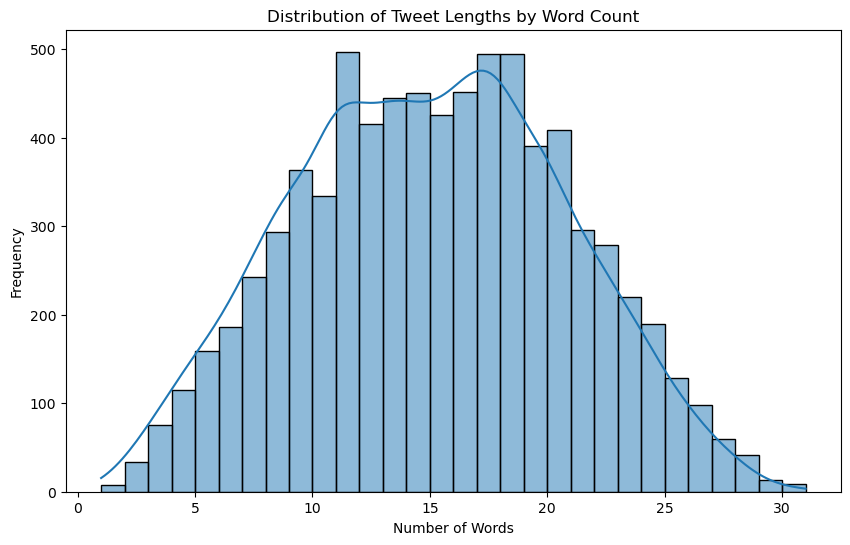

In [28]:
# Calculate tweet length by word count
df['word_length'] = df['text'].apply(lambda x: len(x.split()))
# Plotting the distribution of tweet lengths by word count
plt.figure(figsize=(10, 6))
sns.histplot(df['word_length'], bins=30, kde=True)
plt.title("Distribution of Tweet Lengths by Word Count")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Visualising most common punctuations in the text data

In [30]:
# Extract all punctuation marks from each tweet
def extract_punctuations(text):
    return re.findall(r'[^\w\s]', text)

In [32]:
# Flatten the list of punctuation from all tweets and count frequencies
from collections import Counter
all_punctuations = [punc for text in df['text'] for punc in extract_punctuations(text)]
punctuation_counts = Counter(all_punctuations)

In [34]:
# Convert to DataFrame for visualization
punctuation_df = pd.DataFrame(punctuation_counts.items(), columns=['Punctuation', 'Frequency'])
punctuation_df = punctuation_df.sort_values(by='Frequency', ascending=False)
print(punctuation_df)

   Punctuation  Frequency
13           /      14585
1            .      11696
11           :       6910
0            #       3403
2            '       3157
7            ?       3126
12           @       2759
6            -       1753
8            !       1173
14                   797
9            ;        587
15           &        457
10           )        373
16           (        349
20           *        179
19           |        152
17           [        132
18           ]        131
24           +         80
4            =         53
25           ÷         49
26           %         46
22           $         44
23                    44
27           ~         37
21           ¢         10
34           ©         10
32           ^          6
28           £          6
33           ¨          6
36           \          5
30           }          4
38           ¡          3
39           `          3
40           {          3
29           ¤          3
35           «          2
3           

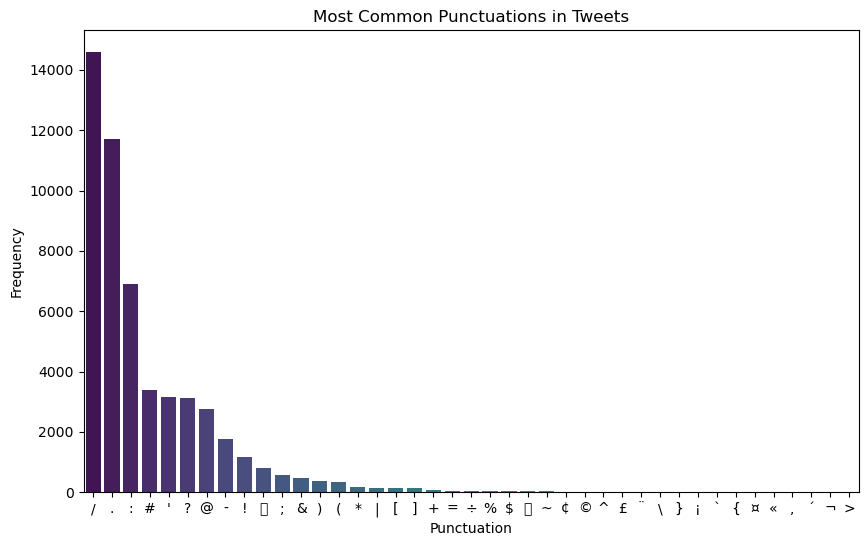

In [36]:
# Plotting the most common punctuations
plt.figure(figsize=(10, 6))
sns.barplot(x='Punctuation', y='Frequency', data=punctuation_df, palette="viridis")
plt.title("Most Common Punctuations in Tweets")
plt.xlabel("Punctuation")
plt.ylabel("Frequency")
plt.show()

# Part 2: Data Preparation

## 1. Text Cleaning

In [40]:
df['text'].head(5)

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [42]:
import re
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text) 
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
    return text

In [44]:
df['cleaned_text'] = df['text'].apply(clean_text)

In [46]:
# Convert text column to lowercase
df["cleaned_text"] = df["cleaned_text"].str.lower()

In [48]:
df['cleaned_text'].head(5)

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    13000 people receive wildfires evacuation orde...
4    just got sent this photo from ruby alaska as s...
Name: cleaned_text, dtype: object

In [67]:
df['cleaned_text'].head(1)

0    our deeds are the reason of this earthquake ma...
Name: cleaned_text, dtype: object

### 2. Tokenization

In [69]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
df['tokens'] = df['cleaned_text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\skhai\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [71]:
df.head(5)

,id,keyword,location,text,target,char_length,word_length,cleaned_text,tokens
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


## Save cleaned data

In [74]:
df.to_csv('cleaned_twitter_disaster.csv',index=False)